There are 17 pads with a total of 57147 elementary operations
PAD:Group 6_session 1

SCORES
User proportion per paragraph score:0.153227582444
Proportion score:0.853608758871
Synchronous score:0.8988596926127947
Alternating score:0.11363636363636363
Break score day:6.826255491190095e-06
Break score short:5.461004392952076e-06
Overall write type score:0.18855218855218855
Overall paste type score:0.06565656565656566
Overall delete type score:0.07407407407407407
Overall edit type score:0.6717171717171717
User write score:0.864672601236
User paste score:0.75753567212
User delete score:0.761346680891
User edit score:0.960455578743
PAD:Group 3_session 1

SCORES
User proportion per paragraph score:0.181084829819
Proportion score:0.958017780914
Synchronous score:0.8802837718001787
Alternating score:0.2553191489361702
Break score day:6.618601471787944e-06
Break score short:7.942321766145534e-06
Overall write type score:0.3049792531120332
Overall paste type score:0.058091286307053944
Overall del

PAD:Group 5_session 1

SCORES
User proportion per paragraph score:0.0151357673707
Proportion score:0.772702498857
Synchronous score:0.5849950295304377
Alternating score:0.15254237288135594
Break score day:6.821484830747665e-06
Break score short:6.821484830747665e-06
Overall write type score:0.3643410852713178
Overall paste type score:0.046511627906976744
Overall delete type score:0.07751937984496124
Overall edit type score:0.5116279069767442
User write score:0.997244285853
User paste score:0.75841890572
User delete score:0.95280346393
User edit score:0.995344466849
PAD:Group 7_session 1

SCORES
User proportion per paragraph score:0.198062936088
Proportion score:0.874577606942
Synchronous score:0.804298341561475
Alternating score:0.16666666666666666
Break score day:6.822348418627257e-06
Break score short:9.551287786078158e-06
Overall write type score:0.27
Overall paste type score:0.04666666666666667
Overall delete type score:0.10333333333333333
Overall edit type score:0.58
User write sc

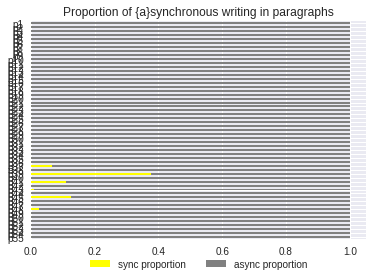

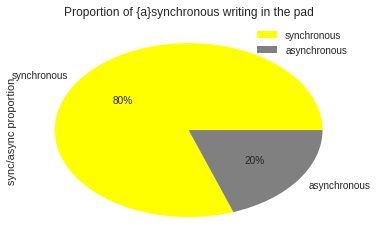

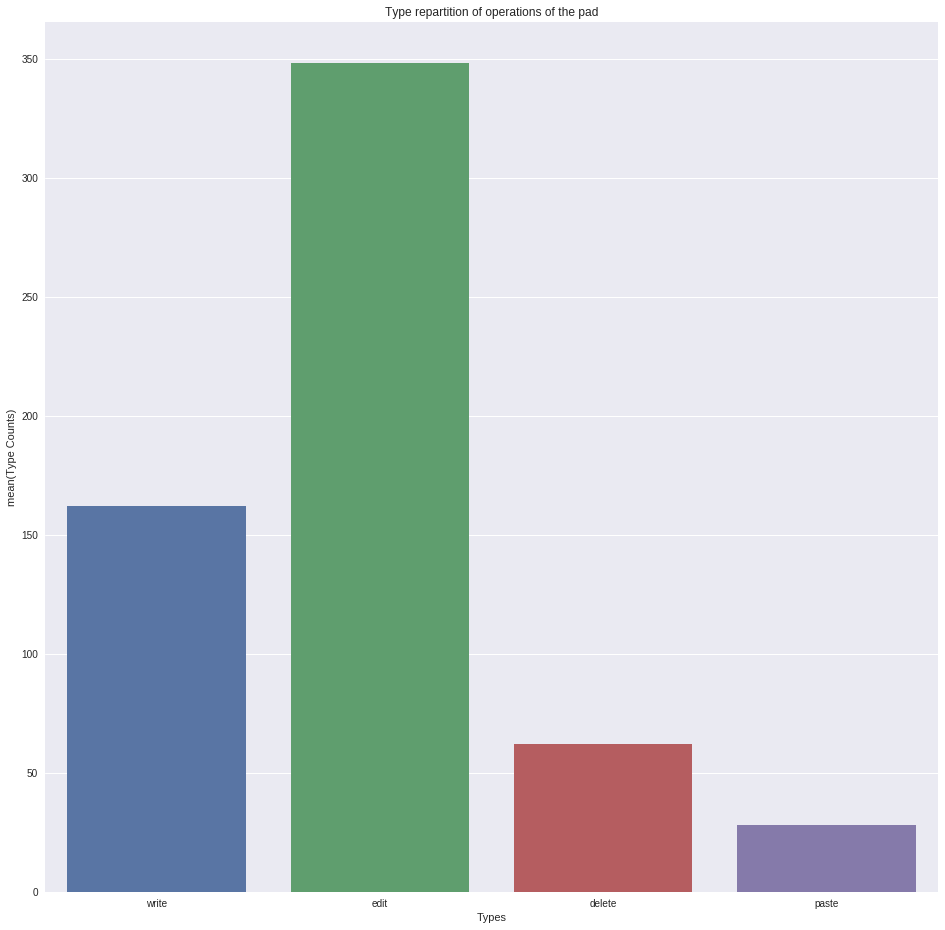

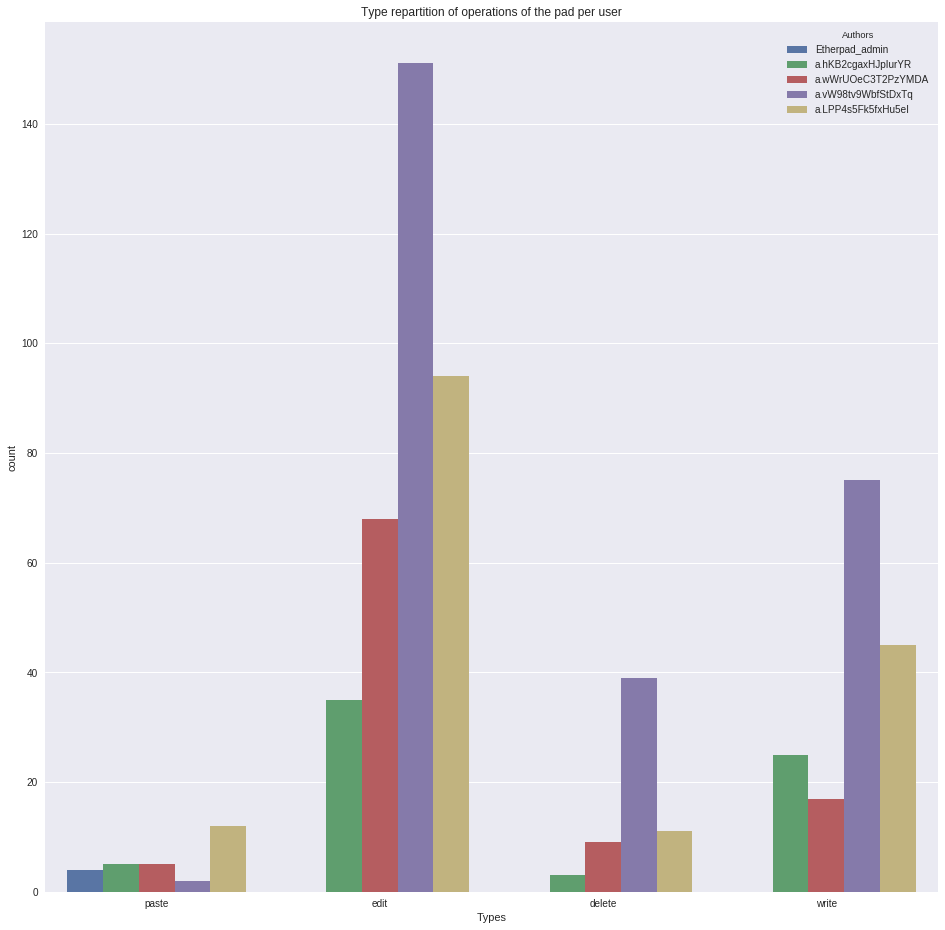

In [97]:
import config
from analytics import operation_builder
from analytics.parser import *
from analytics.visualization import *
import os
import time
from pprint import pprint
import pandas as pd

list_of_elem_ops_per_pad = dict()
elemOpsCounter = 0
root_of_dbs = "belgian_experiment/"
for (dirpath, dirnames, filenames) in os.walk(root_of_dbs):
    for filename in filenames:
        if ".db" in filename:
            path_to_db = os.path.join(dirpath, filename)
            list_of_elem_ops_per_main, _ = get_elem_ops_per_pad_from_db(path_to_db=path_to_db, editor='etherpadSQLite3')
            pad_name = path_to_db[len(root_of_dbs):path_to_db.find("data") - 1]
            assert len(list_of_elem_ops_per_main.keys()) == 1
            list_of_elem_ops_per_pad[pad_name] = list_of_elem_ops_per_main['main']

pads, _, elem_ops_treated = operation_builder.build_operations_from_elem_ops(list_of_elem_ops_per_pad,
                                                                             config.maximum_time_between_elem_ops)

for pad_name in pads:
    elemOpsCounter += len(elem_ops_treated[pad_name])
    pad = pads[pad_name]
    # create the paragraphs
    pad.create_paragraphs_from_ops(elem_ops_treated[pad_name])
    # classify the operations of the pad
    pad.classify_operations(length_edit=config.length_edit, length_delete=config.length_delete)
    # find the context of the operation of the pad
    pad.build_operation_context(config.delay_sync, config.time_to_reset_day, config.time_to_reset_break)

print("There are %s pads with a total of %s elementary operations" % (str(len(pads)), str(elemOpsCounter)))

user_participation_paragraph_score_list = []
prop_score_list = []
sync_score_list = []
alternating_score_list = []
break_score_day_list = []
break_score_short_list = []
type_overall_score_write_list = []
type_overall_score_delete_list = []
type_overall_score_edit_list = []
type_overall_score_paste_list = []
user_type_score_delete_list = []
user_type_score_edit_list = []
user_type_score_write_list = []
user_type_score_paste_list = []

pad_names = list(pads)
times = dict()
old_time = time.time()
for pad_name in pad_names:
    pad = pads[pad_name]
    
    user_participation_paragraph_score = pad.user_participation_paragraph_score()
    key='user_participation_paragraph_score time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    user_participation_paragraph_score_list.append(user_participation_paragraph_score)
    
    prop_score = pad.prop_score()
    key='prop_score time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    prop_score_list.append(prop_score)
    
    sync_score = pad.sync_score()[0]
    key='sync_score time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    sync_score_list.append(sync_score)
    
    alternating_score = pad.alternating_score()
    key='alternating_score time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    alternating_score_list.append(alternating_score)

    break_score_day = pad.break_score('day')
    key='break_score day time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    break_score_day_list.append(break_score_day)

    break_score_short = pad.break_score('short')
    key='break_score short time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    break_score_short_list.append(break_score_short)
    
    type_overall_score_write = pad.type_overall_score('write')
    key='type_overall_score(write) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    type_overall_score_write_list.append(type_overall_score_write)

    type_overall_score_paste = pad.type_overall_score('paste')
    key='type_overall_score(paste) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    type_overall_score_paste_list.append(type_overall_score_paste)
    
    type_overall_score_delete = pad.type_overall_score('delete')
    key='type_overall_score(delete) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    type_overall_score_delete_list.append(type_overall_score_delete)
    
    type_overall_score_edit = pad.type_overall_score('edit')
    key='type_overall_score(edit) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    type_overall_score_edit_list.append(type_overall_score_edit)
    
    user_type_score_write = pad.user_type_score('write')
    key='user_type_score(write) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    user_type_score_write_list.append(user_type_score_write)

    user_type_score_paste = pad.user_type_score('paste')
    key='user_type_score(paste) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    user_type_score_paste_list.append(user_type_score_paste)
    
    user_type_score_delete = pad.user_type_score('delete')
    key='user_type_score(delete) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    user_type_score_delete_list.append(user_type_score_delete)
    
    user_type_score_edit = pad.user_type_score('edit')
    key='user_type_score(edit) time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    user_type_score_edit_list.append(user_type_score_edit)
    
    pad.get_text()
    key='get_text time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
        
    pad.display_text_colored_by_authors()
    key='display_text_colored_by_authors time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
        
    pad.display_text_colored_by_ops()
    key='display_text_colored_by_ops time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
        
    to_print = "PAD:" + pad_name + "\n" \
               + '\nSCORES' \
               + '\nUser proportion per paragraph score:' + str(user_participation_paragraph_score) \
               + '\nProportion score:' + str(prop_score) \
               + '\nSynchronous score:' + str(sync_score) \
               + '\nAlternating score:' + str(alternating_score) \
               + '\nBreak score day:' + str(break_score_day) \
               + '\nBreak score short:' + str(break_score_short) \
               + '\nOverall write type score:' + str(type_overall_score_write) \
               + '\nOverall paste type score:' + str(type_overall_score_paste) \
               + '\nOverall delete type score:' + str(type_overall_score_delete) \
               + '\nOverall edit type score:' + str(type_overall_score_edit) \
               + '\nUser write score:' + str(user_type_score_write) \
               + '\nUser paste score:' + str(user_type_score_paste) \
               + '\nUser delete score:' + str(user_type_score_delete) \
               + '\nUser edit score:' + str(user_type_score_edit)
    print(to_print)
    with open("testing stuff/texts/" + pad_name + ".txt", "w+", encoding='utf-8') as f:
        f.write(to_print)
    key='writing toprint to disk time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time() 
    
    
    display_user_participation(pad, 'testing stuff/figures')
    key='display_user_participation time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    # plot the participation proportion per user per paragraphs
    display_user_participation_paragraphs(pad, 'testing stuff/figures')
    key='display_user_participation_paragraphs time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
        
    display_user_participation_paragraphs_with_del(pad, 'testing stuff/figures')
    key='display_user_participation_paragraphs_with_del time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()

    # plot the proportion of synchronous writing per paragraphs
    display_proportion_sync_in_paragraphs(pad, 'testing stuff/figures')
    key='display_proportion_sync_in_paragraphs time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
        
    display_proportion_sync_in_pad(pad, 'testing stuff/figures')
    key='display_proportion_sync_in_pad time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()

    # plot the overall type counts
    display_overall_op_type(pad, 'testing stuff/figures')
    key='display_overall_op_type time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()
    # plot the counts of type per users
    display_types_per_user(pad, 'testing stuff/figures')
    key='display_types_per_user time'
    if key in times:
        times[key] += time.time()-old_time
        old_time = time.time()
    else:
        times[key] = time.time()-old_time
        old_time = time.time()

In [109]:
pprint(times)

{'alternating_score time': 0.020652055740356445,
 'break_score day time': 0.06783461570739746,
 'break_score short time': 0.059828996658325195,
 'display_overall_op_type time': 11.795707941055298,
 'display_proportion_sync_in_pad time': 4.989798545837402,
 'display_proportion_sync_in_paragraphs time': 27.416099309921265,
 'display_text_colored_by_authors time': 20.87088394165039,
 'display_text_colored_by_ops time': 17.44352149963379,
 'display_types_per_user time': 65.36831760406494,
 'display_user_participation time': 6.915551424026489,
 'display_user_participation_paragraphs time': 57.6734824180603,
 'display_user_participation_paragraphs_with_del time': 88.08197093009949,
 'get_text time': 0.8837029933929443,
 'prop_score time': 0.11600852012634277,
 'sync_score time': 0.16910910606384277,
 'type_overall_score(delete) time': 0.0033600330352783203,
 'type_overall_score(edit) time': 0.003612041473388672,
 'type_overall_score(paste) time': 0.003409147262573242,
 'type_overall_score(wr